## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

## Import the data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Decision Tree Classifier/Dataset/processed.cleveland.data", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ["age",
              "sex",
              "cp",
              "restbp",
              "chol",
              "fbs",
              "restecg",
              "thalach",
              "exang",
              "oldpeak",
              "slope",
              "ca",
              "thal",
              "hd"]

df.head()              

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data Part 1: Identifying Missing Data

In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

There are "?" in columns "ca" and "thal".

Now that we have identified some missing values we need to deal with them.

In [7]:
len(df[(df["ca"] == "?") | (df["thal"] == "?")])

6

so there are six rows with "?"

In [8]:
df[(df["ca"] == "?") | (df["thal"] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
len(df)

303

In [10]:
print("Percentage of Missing Values:", round(6/303*100, 2), "%")

Percentage of Missing Values: 1.98 %


In [11]:
df_no_missing = df[(df["ca"] != "?") & (df["thal"] != "?")]
df_no_missing.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
print("Number of rows:",len(df_no_missing))

Number of rows: 297


In [13]:
df_no_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
df_no_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Format Data Part 1: Split the Data into Dependent and Independent Variables.

In [15]:
X = df_no_missing.drop(columns = ["hd"], axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = df_no_missing["hd"].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format the Data Part 2: One-Hot Encoding

In [17]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [19]:
X["cp"].unique()

array([1., 4., 3., 2.])

In [20]:
pd.get_dummies(X, columns = ["cp"]).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [21]:
X_encoded = pd.get_dummies(X, columns = ["cp", "restecg", "slope", "thal"])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [22]:
y.unique()

array([0, 2, 1, 3, 4])

In [23]:
y[y>0] = 1
y.unique()

array([0, 1])

## Build A Preliminary Classification Tree

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

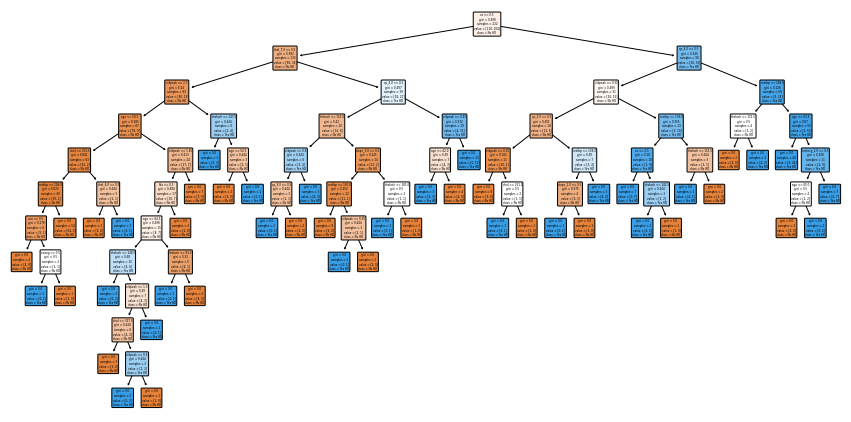

In [25]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt,
          filled = True,
          rounded = True,
          class_names=["No HD", "Yes HD"],
          feature_names = X_encoded.columns)
plt.show()

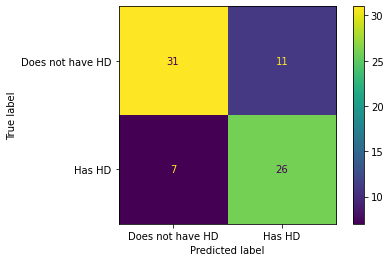

In [26]:
## Plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["Does not have HD", "Has HD"])
plt.show()

<br>In the confusion matrix, we see that of the **31 + 11 = 42** people that did not have **Heart Disease**, **31(74%)** were correctly classified.
<br>And of the **7 + 26 = 33** people that have **Heart Disease**, **26(79%)** were correctly classified.


Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset.
<br>So let's prune the tree. **Pruning**, In theory, should solve the overfitting problem and give us better results.

## Cost Complexity Pruning Part 1: Visualize alpha

In [27]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas # Extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # Exclude the maximum value for alpha

clf_dts = [] # Create an aray that will put decision tree into

# Now create one decision tree per value for alpha and store it in array
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

In [28]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

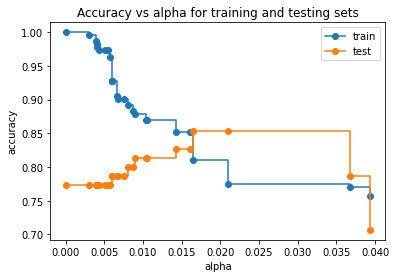

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = "o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = "o", label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the Testing Dataset hits its maximum value when alpha is about 0.016. After this value for alpha the accuracy of the Training Dataset drops off and that suggests we should set `ccp_alpha = 0.016`.

 

## Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

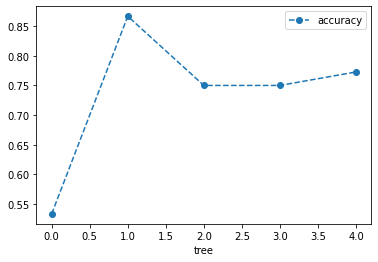

In [30]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016) # Create the tree with ccp_alpha = 0.016

# Now use 5-fold cross validation create 5 different training and testing datasets
# that are used to train and test the tree.
# NOTE: We use 5-fold cross validation because we dont have tons of data

scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {
    "tree" : range(5),
    "accuracy" : scores,
})

df.plot(x = "tree", y = "accuracy", marker = "o", linestyle = "--")
plt.show()

The graph above shows that using different Training and **Testing** data with same `alpha` resulted in different accuracies, suggesting that `alpha` is sensitive to the datasets. So instead of picking a single **Training** dataset and single **Testing** dataset, let's use **cross validation** to find the optimal value for `ccp_alpha`.

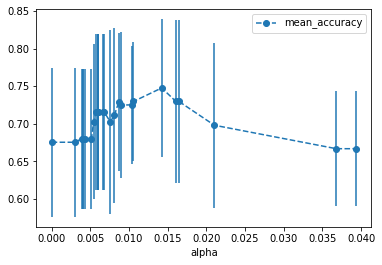

In [32]:
# Create an array to store the results of each fold during cross validation.
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of scores (the accuracy) for each call
# to cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we can draw a graph of the means and standard deviations of the scores
# for each value of alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns = ["alpha", "mean_accuracy", "std"])

alpha_results.plot(x = "alpha", y = "mean_accuracy", yerr = "std", marker = "o", linestyle = "--")
plt.show()

Using cross validation, we can see that overall, instead of setting `ccp_alpha = 0.016`, we need to set it to something close to 0.014. We can find the exact value with:

In [35]:
alpha_results[(alpha_results["alpha"] > 0.014) & (alpha_results["alpha"] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


Now let's store the ideal value of alpha so that we can use to build the best tree.

In [39]:
ideal_ccp_alpha = alpha_results[(alpha_results["alpha"] > 0.014) & (alpha_results["alpha"] < 0.015)]["alpha"]

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [43]:
# Convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)

ideal_ccp_alpha

0.014224751066856332

Now we have the ideal value of `alpha` to build our final **classification tree** by setting `ccp_alpha = ideal_ccp_alpha`.

## Buliding, Evaluating, Drawing and Interpreting the Final Classification Tree.

In [44]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

Now let's draw another confusion matrix to see if the pruned tree does better.

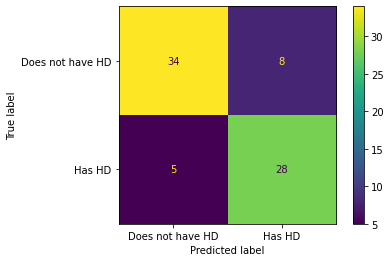

In [45]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test,
                      display_labels = ["Does not have HD", "Has HD"])
plt.show()

We see that pruned tree is better at classifying patients than the full sized tree.

Of the **34 + 8 = 42** people who did not have heart disease, **34 (84%)** were classified correctly. This is an improvement over a full sized tree which only correctly classified **31 (74%)** of patients without heart disease.
<br>Of the **5 + 28 = 33** people with heart disease, **28 (85%)** were correctly classified. Again this is an improvement over a full sized tree which only classified 26(79%) of patients with heart disease.

Now lets draw the pruned tree....

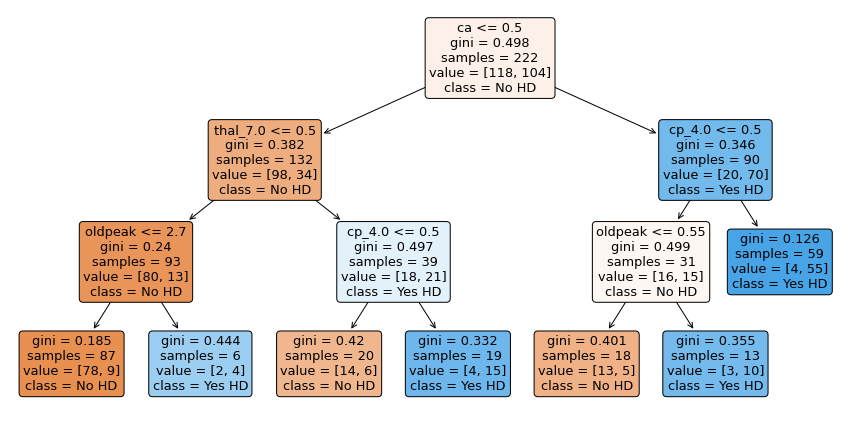

In [47]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt_pruned,
          filled = True,
          rounded = True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X_encoded.columns)
plt.show()